**📚 Proyek Mini: Analisis Data Penjualan Pustaka Digital**

**Skenario**

**Anda adalah seorang analis data yang baru bergabung dengan "Pustaka Digital". Anda diberikan beberapa file data terpisah: data pelanggan, data produk (buku), pesanan dari dua bulan yang berbeda, item dalam setiap pesanan, data karyawan, daftar buku yang sedang promo, data pesanan yang dikembalikan, dan ulasan produk.**

**Tujuan utama Anda adalah menggabungkan beberapa sumber data yang terpisah ini untuk membuat satu dataset master yang komprehensif. Dataset ini akan digunakan untuk menjawab beberapa pertanyaan bisnis penting.** 

----

**1. Persiapan Data**

In [62]:
import pandas as pd

# Memuat semua dataset dari file CSV
customers = pd.read_csv('customers.csv')
orders_jan = pd.read_csv('orders_jan.csv', parse_dates=['order_date'])
orders_feb = pd.read_csv('orders_feb.csv', parse_dates=['order_date'])
order_items = pd.read_csv('order_items.csv')
employees = pd.read_csv('employees.csv')
special_offers = pd.read_csv('special_offers.csv')
returned_orders = pd.read_csv('returned_orders.csv')
product_reviews = pd.read_csv('product_reviews.csv')

# Penting: memuat products.csv dengan product_id sebagai index
products = pd.read_csv('products.csv', index_col='product_id')

print("✅ Semua file CSV berhasil dimuat ke dalam DataFrame!")
print("\nContoh data produk:")
products.head()

✅ Semua file CSV berhasil dimuat ke dalam DataFrame!

Contoh data produk:


,book_title,author,price
product_id,,,
201,Data Science 101,Dr. Alpha,150000
202,Python for Beginners,Dr. Beta,120000
203,Advanced SQL,Dr. Gamma,180000
204,Machine Learning Zero to Hero,Dr. Alpha,250000
205,Pandas Guidebook,Dr. Delta,175000


----

**Tugas**

**2. Menggabungkan Data Pesanan (Concatenation)**

**Manajemen ingin melihat semua data pesanan dari bulan Januari dan Februari dalam satu tabel.**

- Gunakan pd.concat() untuk menggabungkan orders_jan dan orders_feb secara vertikal.
- Pastikan index dari DataFrame hasil gabungan menjadi unik dan berurutan dari 0.
- Sebagai eksperimen, coba jalankan konkatenasi lagi tetapi dengan verify_integrity=True (tanpa mengatur ulang index). Amati apa yang terjadi dan pahami mengapa error itu muncul (mengacu pada materi verifikasi integritas).

**Konsep yang Diterapkan:**

- pd.concat()
- Parameter ignore_index
- Parameter verify_integrity

In [63]:
all_orders = pd.concat([orders_jan, orders_feb], ignore_index=True) 

# wanna to experiment -> akan eror raise ValueError(f"Indexes have overlapping values: {overlap}") 
# data tumpang tindih karna tidak di atur ulang dengan ignore_index=True
# all_orders = pd.concat([orders_jan, orders_feb],verify_integrity=True) 

print("Laporan Pesanan Januari - February")
print('=' * 50)
all_orders

Laporan Pesanan Januari - February


,order_id,customer_id,order_date
0,1,101,2025-01-15
1,2,102,2025-01-17
2,3,101,2025-01-20
3,4,103,2025-01-22
4,5,104,2025-02-05
5,6,102,2025-02-10
6,7,105,2025-02-12
7,8,103,2025-02-15


----

**3. Menggabungkan Pesanan dengan Pelanggan (Inner Join)**

**Setelah memiliki daftar semua pesanan, sekarang saatnya menambahkan informasi pelanggan ke setiap pesanan.**

- Gabungkan (merge) tabel pesanan gabungan dari Langkah 2 dengan tabel customers.
- Gunakan kolom customer_id sebagai kunci.
- Karena setiap pesanan pasti memiliki pelanggan, inner join adalah pilihan yang tepat.

**Konsep yang Diterapkan:**

- Inner Join (.merge())
- Memahami hubungan one-to-many (satu pelanggan bisa punya banyak pesanan)

In [64]:
customer_information =  all_orders.merge(customers, how='inner', on='customer_id', validate='many_to_one') #many_to_one atau sebaliknya

print("Laporan informasi pelanggan")
print('=' * 50)
customer_information

Laporan informasi pelanggan


,order_id,customer_id,order_date,name,email
0,1,101,2025-01-15,Andi,andi@mail.com
1,2,102,2025-01-17,Budi,budi@mail.com
2,3,101,2025-01-20,Andi,andi@mail.com
3,4,103,2025-01-22,Citra,citra@mail.com
4,5,104,2025-02-05,Dewi,dewi@mail.com
5,6,102,2025-02-10,Budi,budi@mail.com
6,7,105,2025-02-12,Eka,eka@mail.com
7,8,103,2025-02-15,Citra,citra@mail.com


-----

**4. Menambahkan Detail Produk (Merging on Index)**

**Selanjutnya, kita perlu tahu buku apa saja yang ada di setiap pesanan.**

- Gabungkan tabel order_items dengan tabel products.
- Perhatikan bahwa kunci join (product_id) adalah kolom biasa di order_items tetapi merupakan index di products.
- Anda perlu menggunakan parameter left_on dan right_index.

**Konsep yang Diterapkan:**
- Merging on an index (left_on, right_index)

In [65]:
order_with_products = order_items.merge(products, left_on='product_id', right_index=True) # default how='inner'
print('Buku yang terdaftar dalam pesanan')
print('=' * 50)
order_with_products

Buku yang terdaftar dalam pesanan


,order_id,product_id,quantity,book_title,author,price
0,1,201,1,Data Science 101,Dr. Alpha,150000
1,1,202,1,Python for Beginners,Dr. Beta,120000
2,2,203,1,Advanced SQL,Dr. Gamma,180000
3,3,202,2,Python for Beginners,Dr. Beta,120000
4,4,204,1,Machine Learning Zero to Hero,Dr. Alpha,250000
5,5,205,1,Pandas Guidebook,Dr. Delta,175000
6,6,201,1,Data Science 101,Dr. Alpha,150000
7,6,203,1,Advanced SQL,Dr. Gamma,180000
8,7,206,1,Statistics for Dummies,Dr. Epsilon,135000
9,8,201,1,Data Science 101,Dr. Alpha,150000


----

 **5. Membuat Laporan Penjualan Lengkap (Chaining Multiple Merges)**

 **Saatnya menyatukan semuanya untuk membuat satu laporan master!**

- Gabungkan hasil dari Langkah 3 (pesanan + pelanggan) dengan hasil dari Langkah 4 (item pesanan + produk).
- Gunakan order_id sebagai kunci untuk penggabungan ini.
- Anda bisa melakukannya dengan chaining (menyambung) beberapa metode .merge(). Hasilnya harus berisi informasi pelanggan, pesanan, dan detail produk dalam satu baris untuk setiap item yang dibeli.

**Konsep yang Diterapkan:**

- Merging multiple DataFrames.

In [66]:
# cek apakah ada column order_id jika ada tidak perlu chaining sampai banyak
print(customer_information.columns)
print(order_with_products.columns)


Index(['order_id', 'customer_id', 'order_date', 'name', 'email'], dtype='object')
Index(['order_id', 'product_id', 'quantity', 'book_title', 'author', 'price'], dtype='object')


In [67]:
## additional
# # Menggabungkan tiga DataFrame sekaligus dengan metode chaining
# laporan_lengkap_chained = penjualan.merge(pelanggan, on='id_pelanggan').merge(produk, on='id_produk')
# laporan_lengkap_chained

putting_together = customer_information.merge(order_with_products, on='order_id')
print("data yang sudah di gabung semua")
print('=' * 50)
putting_together


data yang sudah di gabung semua


,order_id,customer_id,order_date,name,email,product_id,quantity,book_title,author,price
0,1,101,2025-01-15,Andi,andi@mail.com,201,1,Data Science 101,Dr. Alpha,150000
1,1,101,2025-01-15,Andi,andi@mail.com,202,1,Python for Beginners,Dr. Beta,120000
2,2,102,2025-01-17,Budi,budi@mail.com,203,1,Advanced SQL,Dr. Gamma,180000
3,3,101,2025-01-20,Andi,andi@mail.com,202,2,Python for Beginners,Dr. Beta,120000
4,4,103,2025-01-22,Citra,citra@mail.com,204,1,Machine Learning Zero to Hero,Dr. Alpha,250000
5,5,104,2025-02-05,Dewi,dewi@mail.com,205,1,Pandas Guidebook,Dr. Delta,175000
6,6,102,2025-02-10,Budi,budi@mail.com,201,1,Data Science 101,Dr. Alpha,150000
7,6,102,2025-02-10,Budi,budi@mail.com,203,1,Advanced SQL,Dr. Gamma,180000
8,7,105,2025-02-12,Eka,eka@mail.com,206,1,Statistics for Dummies,Dr. Epsilon,135000
9,8,103,2025-02-15,Citra,citra@mail.com,201,1,Data Science 101,Dr. Alpha,150000


----

**6. Menganalisis Ulasan Produk (Left & Outer Join)**

**Manajemen ingin melihat ulasan untuk setiap produk. Namun, tidak semua produk memiliki ulasan.**

- Gabungkan tabel products (sebagai tabel kiri) dengan product_reviews. Anda harus memastikan semua produk tetap ada di hasil akhir, meskipun tidak ada ulasannya. Tipe join apa yang paling sesuai?
- Setelah itu, coba gunakan outer join. Diskusikan perbedaan hasilnya dan skenario apa yang membuat outer join lebih berguna.

**Konsep yang Diterapkan:**

- Left Join (how='left')
- Outer Join (how='outer')


In [68]:

# Left Join (how='left') adalah jawaban yang paling tepat untuk permintaan awal: "memastikan semua produk tetap ada".
# look_at_reviews = products.merge(product_reviews, on='product_id', how='left')
# look_at_reviews

look_at_reviews = products.merge(product_reviews, on='product_id', how='outer')
print("looking for all reviews")
print('=' * 50)
look_at_reviews


# Outer Join (how='outer') akan berguna jika ada kemungkinan product_reviews memiliki ulasan
#  untuk produk yang sudah tidak ada di tabel products. Outer join akan menampilkan semua produk DAN semua ulasan, 
# meskipun salah satunya tidak memiliki pasangan.

looking for all reviews


,product_id,book_title,author,price,rating,review_text
0,201,Data Science 101,Dr. Alpha,150000,5.0,Sangat membantu!
1,201,Data Science 101,Dr. Alpha,150000,4.0,Buku wajib untuk pemula.
2,202,Python for Beginners,Dr. Beta,120000,NaN,NaN
3,203,Advanced SQL,Dr. Gamma,180000,4.0,Cukup sulit dimengerti.
4,203,Advanced SQL,Dr. Gamma,180000,5.0,Penjelasan mendalam.
5,204,Machine Learning Zero to Hero,Dr. Alpha,250000,5.0,Luar biasa!
6,205,Pandas Guidebook,Dr. Delta,175000,NaN,NaN
7,206,Statistics for Dummies,Dr. Epsilon,135000,NaN,NaN


---

**7. Mengidentifikasi Pesanan dengan Penawaran Spesial (Semi Join)**

**Tim marketing ingin mengetahui pesanan mana saja yang mengandung buku-buku yang sedang dalam penawaran spesial. Mereka hanya butuh daftar pesanan yang relevan, tanpa perlu detail dari tabel penawaran.**

- Lakukan semi join.
- Filter DataFrame laporan penjualan lengkap (dari Langkah 5) untuk hanya menampilkan baris di mana product_id-nya ada di dalam DataFrame special_offers.
- Gunakan metode .isin() seperti yang ditunjukkan dalam materi.

**Konsep yang Diterapkan:**

- Semi Join

In [69]:
books_order_on_special_promo = putting_together[putting_together['product_id'].isin(special_offers['product_id'])] 

print("Orders buku yaang sedang dalam penawaran spesial")
print('=' * 50)
books_order_on_special_promo

Orders buku yaang sedang dalam penawaran spesial


,order_id,customer_id,order_date,name,email,product_id,quantity,book_title,author,price
1,1,101,2025-01-15,Andi,andi@mail.com,202,1,Python for Beginners,Dr. Beta,120000
3,3,101,2025-01-20,Andi,andi@mail.com,202,2,Python for Beginners,Dr. Beta,120000
5,5,104,2025-02-05,Dewi,dewi@mail.com,205,1,Pandas Guidebook,Dr. Delta,175000


---

**8. Mencari Pesanan yang Tidak Dikembalikan (Anti Join)**

**Bagian keuangan perlu data semua transaksi penjualan yang berhasil dan tidak dikembalikan oleh pelanggan.**

- Lakukan anti join.
- Filter DataFrame laporan penjualan lengkap untuk menampilkan semua pesanan yang order_id-nya tidak ada di dalam DataFrame returned_orders.
- Gunakan metode yang diajarkan: merge dengan how='left' dan indicator=True, lalu filter hasilnya.

**Konsep yang Diterapkan:**

- Anti Join

In [70]:
pesanan_not_return = putting_together[~putting_together['order_id'].isin(returned_orders['order_id'])] 
print("Laporan Transaksi sukses tanpa return")
print('=' * 50)
pesanan_not_return

Laporan Transaksi sukses tanpa return


,order_id,customer_id,order_date,name,email,product_id,quantity,book_title,author,price
0,1,101,2025-01-15,Andi,andi@mail.com,201,1,Data Science 101,Dr. Alpha,150000
1,1,101,2025-01-15,Andi,andi@mail.com,202,1,Python for Beginners,Dr. Beta,120000
2,2,102,2025-01-17,Budi,budi@mail.com,203,1,Advanced SQL,Dr. Gamma,180000
4,4,103,2025-01-22,Citra,citra@mail.com,204,1,Machine Learning Zero to Hero,Dr. Alpha,250000
5,5,104,2025-02-05,Dewi,dewi@mail.com,205,1,Pandas Guidebook,Dr. Delta,175000
6,6,102,2025-02-10,Budi,budi@mail.com,201,1,Data Science 101,Dr. Alpha,150000
7,6,102,2025-02-10,Budi,budi@mail.com,203,1,Advanced SQL,Dr. Gamma,180000
9,8,103,2025-02-15,Citra,citra@mail.com,201,1,Data Science 101,Dr. Alpha,150000


---

**9. Memetakan Hierarki Karyawan (Self Join)**

**HR ingin membuat daftar semua karyawan beserta nama manajer mereka dalam satu baris untuk keperluan evaluasi kinerja.**

- Lakukan self-join pada DataFrame employees.

- Gabungkan employees dengan dirinya sendiri. Gunakan left_on='manager_id' dan right_on='employee_id'.

- Gunakan parameter suffixes untuk membedakan kolom nama karyawan (_emp) dan nama manajer (_mgr).

**Konsep yang Diterapkan:*

- Self Join
- Parameter suffixes

In [71]:
hirarcy = employees.merge(employees, left_on='manager_id', right_on='employee_id', suffixes=('_emp', '_mgr'))
print('Laporan Daftar Karyawn Beserta Manajer')
print('=' * 50)
hirarcy



Laporan Daftar Karyawn Beserta Manajer


,employee_id_emp,name_emp,manager_id_emp,employee_id_mgr,name_mgr,manager_id_mgr
0,1,Farhan,3.0,3,Hadi,NaN
1,2,Gina,3.0,3,Hadi,NaN
2,4,Indah,1.0,1,Farhan,3.0
3,5,Joko,1.0,1,Farhan,3.0


---

**10. Validasi Integritas (Validation)**

**Sebelum menyerahkan laporan, Anda harus yakin bahwa hubungan data sudah benar.**

- Ulangi penggabungan antara tabel pesanan gabungan (dari Langkah 2, yang sudah direset index-nya) dengan customers.
- Kali ini, tambahkan parameter validate='many_to_one'. Logikanya adalah, banyak baris pesanan (many) terhubung ke satu baris pelanggan (one).
- Jika tidak ada error, berarti asumsi hubungan data Anda benar.

**Konsep yang Diterapkan:**

- merge(validate=...)

In [72]:
customer_information_validation =  all_orders.merge(customers, how='inner', on='customer_id', validate='many_to_one') #many_to_one atau sebaliknya

# customer_information_validation


---

**🏆 Tantangan Bonus**

- menghitung total pendapatan (harga x kuantitas) untuk setiap pelanggan?

In [73]:

# ini bisa tapi membingungkan mari kita ke step bawah
# total_pendapatan = putting_together['price'] * putting_together['quantity']
# total_pendapatan

putting_together['total_pendapatan'] = putting_together['price'] * putting_together['quantity']
putting_together


,order_id,customer_id,order_date,name,email,product_id,quantity,book_title,author,price,total_pendapatan
0,1,101,2025-01-15,Andi,andi@mail.com,201,1,Data Science 101,Dr. Alpha,150000,150000
1,1,101,2025-01-15,Andi,andi@mail.com,202,1,Python for Beginners,Dr. Beta,120000,120000
2,2,102,2025-01-17,Budi,budi@mail.com,203,1,Advanced SQL,Dr. Gamma,180000,180000
3,3,101,2025-01-20,Andi,andi@mail.com,202,2,Python for Beginners,Dr. Beta,120000,240000
4,4,103,2025-01-22,Citra,citra@mail.com,204,1,Machine Learning Zero to Hero,Dr. Alpha,250000,250000
5,5,104,2025-02-05,Dewi,dewi@mail.com,205,1,Pandas Guidebook,Dr. Delta,175000,175000
6,6,102,2025-02-10,Budi,budi@mail.com,201,1,Data Science 101,Dr. Alpha,150000,150000
7,6,102,2025-02-10,Budi,budi@mail.com,203,1,Advanced SQL,Dr. Gamma,180000,180000
8,7,105,2025-02-12,Eka,eka@mail.com,206,1,Statistics for Dummies,Dr. Epsilon,135000,135000
9,8,103,2025-02-15,Citra,citra@mail.com,201,1,Data Science 101,Dr. Alpha,150000,150000


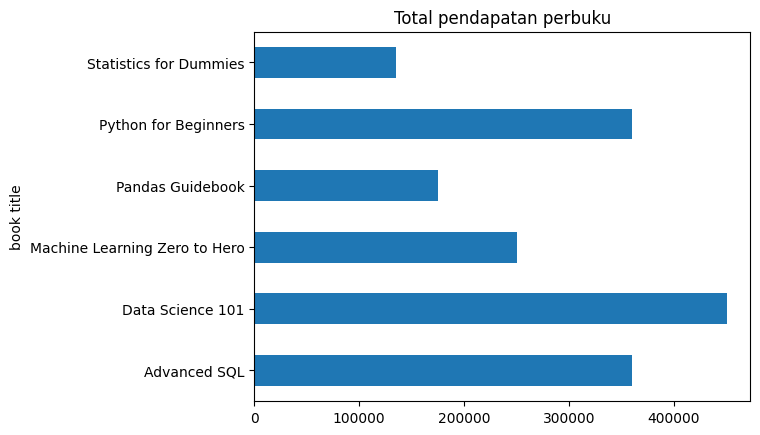

In [74]:

#additional
total_pendapatan = putting_together.groupby('book_title')['total_pendapatan'].sum()

import matplotlib.pyplot as plt

total_pendapatan.plot(kind='barh', x='book_title', y='total_pendapatan')
plt.ylabel("book title")
plt.title("Total pendapatan perbuku")
plt.show()


----